In [ ]:
!pip install statsmodels

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA


This project will work with temperature data from New York city, spaning from 1870 to 2024.
The objective of the project is to estimate an ARIMA model that better fit the data and using it to try and predict the upcoming temperatures.

In [16]:
#loading the Dataset
path = "/temperature.csv"
df = pd.read_csv(path, parse_dates = ['DATE'], index_col = 'DATE', usecols=['DATE','TAVG','TMAX','TMIN','EMNT','EMXT'], infer_datetime_format=True)

In [19]:
df.dropna(inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154 entries, 1870-01-01 to 2023-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMNT    154 non-null    float64
 1   EMXT    154 non-null    float64
 2   TAVG    154 non-null    float64
 3   TMAX    154 non-null    float64
 4   TMIN    154 non-null    float64
dtypes: float64(5)
memory usage: 7.2 KB


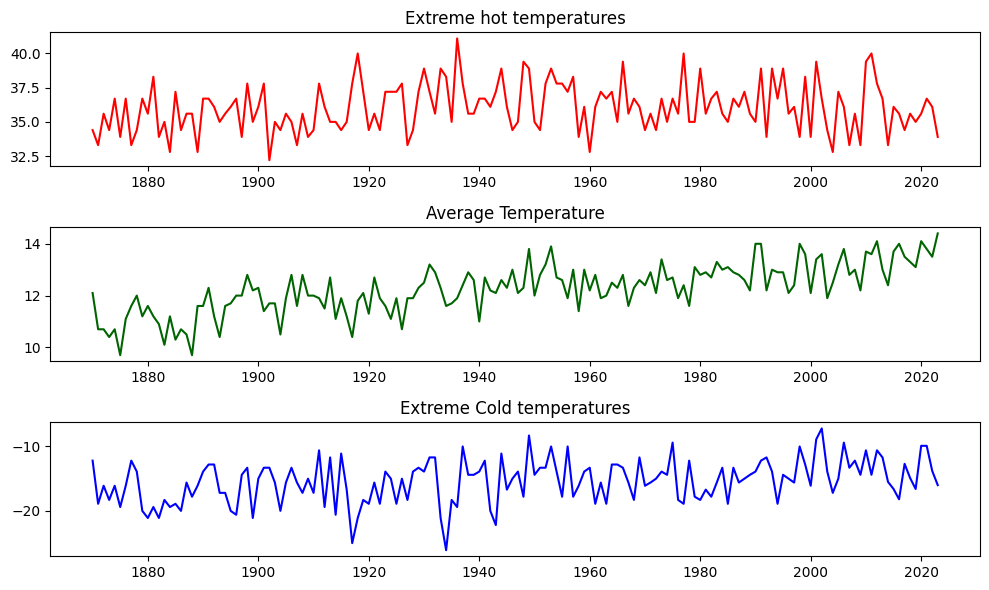

In [18]:
#visualizing how the temperature changes over time
fi, ax = plt.subplots(3,1)
ax[1].plot(df.index, df['TAVG'], color = 'darkgreen')
ax[1].set_title('Average Temperature')
ax[0].plot(df.index, df['EMXT'], color = 'red')
ax[0].set_title('Extreme hot temperatures')
ax[2].plot(df.index, df['EMNT'], color ='blue')
ax[2].set_title('Extreme Cold temperatures')
fi.set_size_inches(10,6)
fi.tight_layout()
plt.show()

In [22]:
#calculating the ADF to test if there is a unit root in the series
result_avg = adfuller(df['TAVG'])
result_eh = adfuller(df['EMXT'])
result_ec = adfuller(df['EMNT'])
#Getting the p-values from the tests
print(f'The P-value for the adf test of the Average temperature is {result_avg[1]}')
print(f'THe P-value for the ADF test of the Extreme hot temperature is {result_eh[1]}')
print(f'The P-value for the ADF test of the extreme cold temperatures is {result_ec[1]}')


The P-value for the adf test of the Average temperature is 0.7148022033863997
THe P-value for the ADF test of the Extreme hot temperature is 6.75111564606249e-22
The P-value for the ADF test of the extreme cold temperatures is 1.830784608163731e-17


All the three test p-value is greater than 5% therefore we fail to reject the null hyphotesis meaning that the time series contain unit roots, therefore they are random walks, nonetheless, the average temperature is a random walk with drift

In [26]:
#since the average temperature is a random walk with drift it is necessary to take the first difference
first_diff = df['TAVG'].diff()
first_diff.dropna(inplace = True)

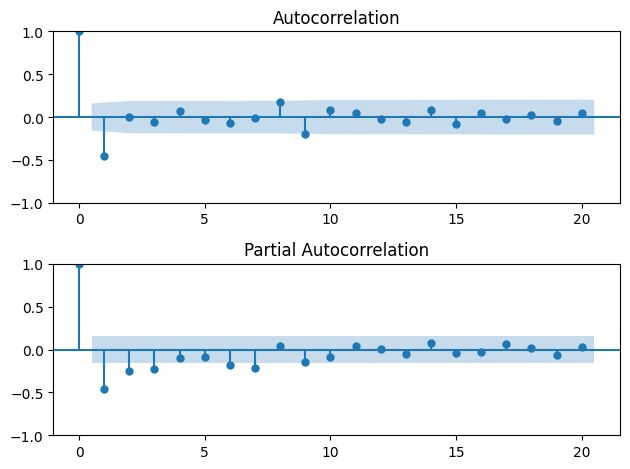

In [28]:
#ploting the autocorrelation Function and the Parcial Autocorrelation Function
fig2, ax2 = plt.subplots(2,1)
plot_acf(first_diff,lags = 20, ax=ax2[0])
plot_pacf(first_diff, lags = 20, ax=ax2[1])
fig2.tight_layout()
plt.show()

In [40]:
#wich ARIMA model is best
#AR(1)
mod1 = ARIMA(first_diff, order = (1,0,0))
res1 = mod1.fit()
print(f'The AIC for an AR(1) is:{res1.aic}')
#AR(2)
mod2 = ARIMA(first_diff, order = (2,0,0))
res2 = mod2.fit()
print(f'The AIC for an AR(2) is: {res2.aic}')
#ARMA(1,1)
mod3 = ARIMA(first_diff, order=(1,0,1))
res3 = mod3.fit()
print(f'The AIC for an ARMA(1,1) is:{res3.aic}')
#ARIMA(1,1,1)
mod4 = ARIMA(df['TAVG'], order = (1,1,1))
res4 = mod4.fit()
print(f'The AIC for an ARIMA 1,1,1) is:{res4.aic}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

The AIC for an AR(1) is:350.07322146349776
The AIC for an AR(2) is: 341.0002963661967


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


The AIC for an ARMA(1,1) is:307.5347739743625
The AIC for an ARIMA 1,1,1) is:316.3414058098741


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [41]:
print(f'The AIC for an AR(1) is:{res1.aic}')
print(f'The AIC for an AR(2) is: {res2.aic}')
print(f'The AIC for an ARMA(1,1) is:{res3.aic}')
print(f'The AIC for an ARIMA 1,1,1) is:{res4.aic}')

The AIC for an AR(1) is:350.07322146349776
The AIC for an AR(2) is: 341.0002963661967
The AIC for an ARMA(1,1) is:307.5347739743625
The AIC for an ARIMA 1,1,1) is:316.3414058098741


In [44]:
#forecasting the temperature with an ARIMA 1,1,1 model, including the trend parameter in the model
model = ARIMA(df['TAVG'], trend = 't', order=(1,1,1))
result = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


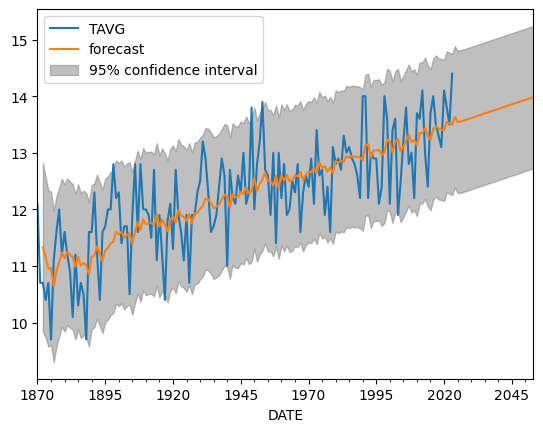

In [49]:
#ploting the original and forecasted series
figure, axis = plt.subplots()
df['TAVG'].plot(ax=axis)
plot_predict(result, start = '1872', end = '2053', ax = axis)
plt.show()